In [1]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

In [72]:
spectra = pd.read_csv('./data/viral_spectra_dataset.csv').query('df == "nemu"')
# spectra = spectra.melt(['Type', 'taxname', 'virusname'], 
#         spectra.columns[:12], 'Mut', 'Rate').sort_values(['virusname', 'Mut'])
spectra

,A>C,A>G,A>T,C>A,C>G,C>T,G>A,G>C,G>T,T>A,T>C,T>G,Type,taxname,df,taxid,virusname
0,0.109127,0.117342,0.073464,0.060217,0.011690,0.149450,0.196651,0.026968,0.020779,0.036932,0.132424,0.064957,ds,Hepatitis B virus,nemu,10407,HBV
1,0.034784,0.086621,0.027108,0.044784,0.006846,0.339187,0.234664,0.000000,0.102792,0.009995,0.095861,0.017356,ds,Rice black streaked dwarf virus,nemu,10990,RBSDV
2,0.012922,0.127692,0.009847,0.022595,0.001792,0.379747,0.123494,0.003866,0.031890,0.022814,0.249177,0.014165,+,West Nile virus,nemu,11082,WNV
3,0.009244,0.183506,0.025201,0.014157,0.002805,0.243095,0.227613,0.012168,0.021287,0.031341,0.224274,0.005309,+,Norwalk virus,nemu,11983,norw
4,0.008840,0.102109,0.025178,0.031668,0.010016,0.490211,0.153864,0.018815,0.025828,0.020681,0.106414,0.006376,+,Hepatovirus A,nemu,12092,HAV
5,0.012652,0.223645,0.018232,0.014670,0.002589,0.201530,0.137092,0.014227,0.017123,0.020364,0.319673,0.018203,+,Foot-and-mouth disease virus,nemu,12110,FMDV
6,0.023573,0.236911,0.063843,0.026172,0.019579,0.233199,0.139336,0.012520,0.030695,0.032620,0.165367,0.016185,+,Citrus tristeza virus,nemu,12162,CTV
7,0.007133,0.108281,0.018650,0.025002,0.004258,0.287104,0.184085,0.007617,0.012060,0.041765,0.293600,0.010445,+,Dengue virus,nemu,12637,denv
8,0.017020,0.091356,0.028301,0.044811,0.004483,0.357214,0.095441,0.009720,0.158906,0.017986,0.153859,0.020902,+,Porcine epidemic diarrhea virus,nemu,28295,PEDV
9,0.019673,0.236590,0.032809,0.015163,0.019141,0.217214,0.148364,0.015851,0.042233,0.026322,0.211156,0.015485,+,Porcine reproductive and respiratory syndrome ...,nemu,28344,PRRSV


In [13]:
mut_all = pd.read_csv('./data/allmut_nemu.csv')
mut_ns = mut_all[mut_all['Label'] == 0]
mut_ns

,Mut,Label,PosInGene,PosInCodon,RefCodon,AltCodon,RefAa,AltAa,ProbaRef,ProbaMut,ProbaFull,RefNode,AltNode,Gene,taxid,Type,taxname,df,virusname
0,A[G>A]A,0,29,2,AGA,AAA,R,K,0.316040,0.301881,0.301881,Node1,Node2,1,10407,ds,Hepatitis B virus,nemu,HBV
2,G[C>T]C,0,773,2,GCC,GTC,A,V,0.645726,0.321229,0.321229,Node1,Node2,1,10407,ds,Hepatitis B virus,nemu,HBV
3,A[G>A]C,0,776,2,AGC,AAC,S,N,0.657652,0.314946,0.314946,Node1,Node2,1,10407,ds,Hepatitis B virus,nemu,HBV
4,C[A>G]C,0,797,2,CAC,CGC,H,R,0.574844,0.342262,0.342262,Node1,Node2,1,10407,ds,Hepatitis B virus,nemu,HBV
5,A[G>A]G,0,904,1,GGA,AGA,G,R,0.736543,0.713864,0.713864,Node1,Node2,1,10407,ds,Hepatitis B virus,nemu,HBV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594233,A[A>T]T,0,812,2,AAT,ATT,N,I,0.997930,0.997930,0.997930,Node2,RN_3,1,77763,ds,Banna virus,nemu,BAV
594235,C[A>G]C,0,1391,2,CAC,CGC,H,R,0.987528,0.987528,0.987528,Node2,RN_3,1,77763,ds,Banna virus,nemu,BAV
594244,A[G>A]C,0,68,2,AGC,AAC,S,N,0.999620,0.999620,0.999620,Node11,RN_9,1,77763,ds,Banna virus,nemu,BAV
594246,G[G>T]C,0,1153,1,GCT,TCT,A,S,0.999950,0.999950,0.999950,Node11,RN_9,1,77763,ds,Banna virus,nemu,BAV


In [14]:
from pymutspec.annotation import mutations_summary

mutations_summary(mut_all, 'taxname')

,non-syn,syn,syn4f,Stop loss
taxname,,,,
Akabane orthobunyavirus,428.0,4194.0,1495.0,0.0
Alphacoronavirus 1,1044.0,3234.0,1507.0,0.0
Avian coronavirus,8300.0,52229.0,24712.0,0.0
Avian orthoreovirus,458.0,14981.0,8748.0,0.0
Banna virus,354.0,3818.0,1717.0,0.0
Citrus tristeza virus,2281.0,5747.0,2959.0,0.0
Deformed wing virus,1758.0,14711.0,6977.0,0.0
Dengue virus,975.0,4977.0,2423.0,0.0
Enterovirus A,2911.0,39710.0,19074.0,0.0


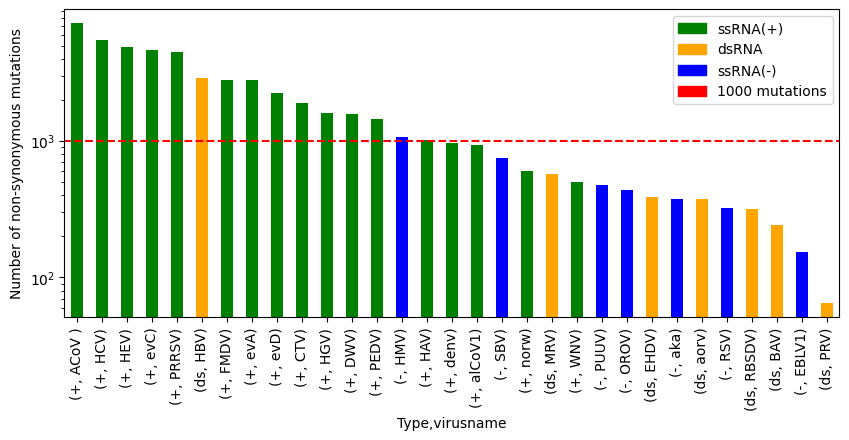

In [15]:
_d = mut_ns.groupby(['Type', 'virusname']).ProbaFull.sum().sort_values(ascending=False)
plt.figure(figsize=(10, 4))
_d.plot.bar(color=_d.index.get_level_values(0).map({'+': 'green', 'ds': 'orange', '-': 'blue'}))

plt.hlines(y=1000, xmin=-1, xmax=mut_all['virusname'].nunique(), color='red', linestyle='--')
plt.ylabel('Number of non-synonymous mutations')
plt.yscale('log')
legend_labels = {'green': 'ssRNA(+)', 'orange': 'dsRNA', 'blue': 'ssRNA(-)', 'red': '1000 mutations'}
patches = [mpatches.Patch(color=color, label=label) for color, label in legend_labels.items()]
plt.legend(handles=patches, loc="upper right")
plt.savefig('figures/ns_mut_cnt.pdf', bbox_inches='tight')
plt.show()

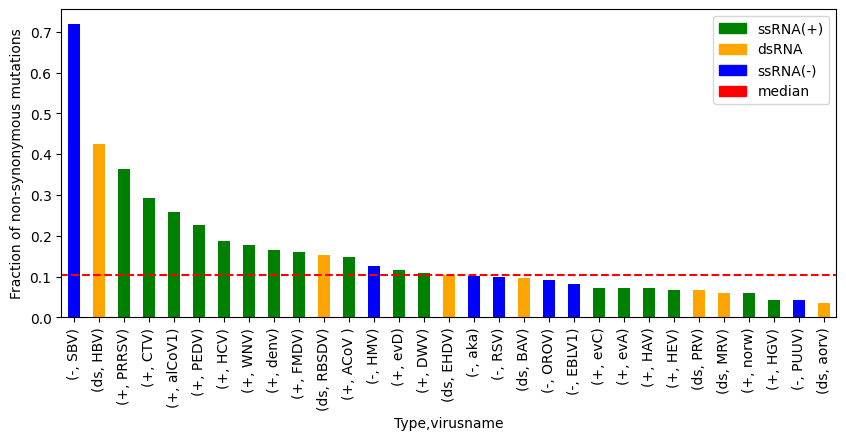

In [ ]:
dnds = mut_all.groupby(['Type', 'virusname', 'Label']).ProbaFull.sum().unstack()
dnds['Dn'] = dnds[0]
dnds['Ds'] = dnds[1] + dnds[2]
dnds['DnDs'] = dnds['Dn'] / (dnds['Dn'] + dnds['Ds'])

_d = dnds.DnDs.sort_values(ascending=False)


plt.figure(figsize=(10, 4))
_d.plot.bar(color=_d.index.get_level_values(0).map({'+': 'green', 'ds': 'orange', '-': 'blue'}))
plt.hlines(y=_d.median(), xmin=-1, xmax=_d.index.nunique(), color='red', linestyle='--', label='median')
legend_labels = {'green': 'ssRNA(+)', 'orange': 'dsRNA', 'blue': 'ssRNA(-)', 'red': 'median'}
patches = [mpatches.Patch(color=color, label=label) for color, label in legend_labels.items()]
plt.legend(handles=patches, loc="upper right")
plt.ylabel('Fraction of non-synonymous mutations')
plt.savefig('figures/ns_mut_frac.pdf', dpi=300, bbox_inches='tight')
plt.show()

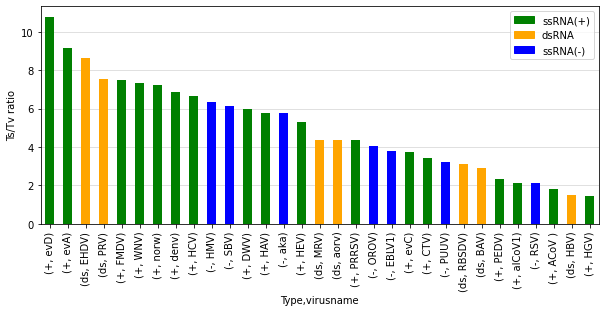

In [88]:
ts = spectra['C>T'] + spectra['T>C'] + spectra['A>G'] + spectra['G>A']
tv = spectra.iloc[:, :12].sum(1) - ts
spectra['ts_tv'] = ts / tv

_d = spectra.set_index(['Type', 'virusname', ]).ts_tv.sort_values(ascending=False)

plt.figure(figsize=(10, 4))
ax = _d.plot.bar(color=_d.index.get_level_values(0).map({'+': 'green', 'ds': 'orange', '-': 'blue'}))
# plt.hlines(y=_d.median(), xmin=-1, xmax=_d.index.nunique(), color='red', linestyle='--', label='median')
legend_labels = {'green': 'ssRNA(+)', 'orange': 'dsRNA', 'blue': 'ssRNA(-)',}
patches = [mpatches.Patch(color=color, label=label) for color, label in legend_labels.items()]
plt.legend(handles=patches, loc="upper right")
plt.grid(axis='y', color='.85')
ax.set_axisbelow(True)
plt.ylabel('Ts/Tv ratio')
plt.savefig('figures/tstv.pdf', dpi=300, bbox_inches='tight')
plt.show()

## Neutral model fit results

In [7]:
vir_fit = pd.read_csv('./data/virs_fit_metrics.csv')\
    .sort_values(['Type', 'mut_count']).set_index(['Type', 'virusname'])
print(vir_fit.shape)
vir_fit

(20, 13)


mape      wape     slope  intercept  spearman_corr  \
Type virusname                                                          
+    WNV        1.71924  0.843942  0.371521   0.004190       0.564182   
     norw       3.54595  0.922882  0.252156   0.004986       0.493512   
     alCoV1     1.41201  0.754293  0.359105   0.004273       0.359444   
     denv       2.01187  0.782598  0.355615   0.004296       0.595249   
     HAV        1.83527  1.029350  0.273920   0.004841       0.336617   
     PEDV       1.17231  0.784659  0.515342   0.003231       0.508756   
     DWV        1.48995  0.855090  0.516771   0.003222       0.639456   
     HGV        2.22006  0.838872  0.127048   0.005820       0.546537   
     CTV        1.10257  0.652005  0.458372   0.003611       0.720344   
     evD        2.07585  0.805865  0.423507   0.003843       0.639814   
     evA        2.11541  0.885658  0.312345   0.004584       0.597364   
     FMDV       1.62785  0.783973  0.462078   0.003586       0.692402   
     PRRSV      1.05095  0.485767  0.729516   0.001803       0.789203   
     evC        2.59936  0.844153  0.301930   0.004654       0.685991   
     HEV        1.06813  0.588886  0.573202   0.002845       0.786192   
     HCV        4.51929  0.949301  0.279959   0.004800       0.606687   
     ACoV       1.98694  0.745437  0.320324   0.004531       0.579993   
-    HMV        1.34446  0.802944  0.434263   0.003772       0.633503   
ds   MRV        1.41193  0.798088  0.230446   0.005130       0.566399   
     HBV        1.53578  0.698985  0.283182   0.004779       0.582388   

                  spearman_p  pearson_corr     pearson_p   ks_stat  \
Type virusname                                                       
+    WNV        5.552490e-14      0.441161  1.600110e-08  0.426667   
     norw       1.392420e-10      0.372998  2.590980e-06  0.353333   
     alCoV1     6.261810e-06      0.355367  8.101800e-06  0.140000   
     denv       9.494280e-16      0.468113  1.537400e-09  0.313333   
     HAV        2.533470e-05      0.231956  4.287970e-03  0.166667   
     PEDV       2.988410e-11      0.495842  1.105980e-10  0.120000   
     DWV        1.284920e-18      0.429621  4.106580e-08  0.200000   
     HGV        4.662870e-13      0.323224  5.474410e-05  0.333333   
     CTV        2.764170e-25      0.567305  3.759780e-14  0.140000   
     evD        1.212540e-18      0.549626  3.241740e-13  0.180000   
     evA        7.082680e-16      0.478550  5.867890e-10  0.200000   
     FMDV       9.832600e-23      0.550951  2.770390e-13  0.200000   
     PRRSV      3.801340e-33      0.773520  4.090900e-31  0.146667   
     evC        3.448180e-22      0.476384  7.185450e-10  0.273333   
     HEV        9.622050e-33      0.664123  1.973800e-20  0.093333   
     HCV        1.895890e-16      0.413103  1.490590e-07  0.293333   
     ACoV       7.389400e-15      0.449248  8.093140e-09  0.206667   
-    HMV        3.328140e-18      0.517540  1.188660e-11  0.213333   
ds   MRV        4.211870e-14      0.387593  9.571550e-07  0.386667   
     HBV        5.392330e-15      0.428978  4.323320e-08  0.233333   

                        ks_p      rmse  log_likelihood  mut_count  
Type virusname                                                     
+    WNV        1.248880e-12  0.012121        -5.67321    501.693  
     norw       1.044100e-08  0.012257        -5.81473    598.962  
     alCoV1     1.057380e-01  0.008489        -6.08549    929.824  
     denv       6.587400e-07  0.011680        -5.61925    972.842  
     HAV        3.083900e-02  0.013440        -6.26793   1020.310  
     PEDV       2.307820e-01  0.008605        -5.98029   1458.280  
     DWV        4.857930e-03  0.011607        -5.87911   1568.950  
     HGV        8.870020e-08  0.012502        -5.78701   1613.560  
     CTV        1.057380e-01  0.007599        -5.73733   1913.750  
     evD        1.534430e-02  0.010999        -5.51383   2261.520  
     evA        4.857930e-03  0.012469        -5.53587 

In [4]:
vir_fit[['spearman_corr', 'wape', 'slope', 'mut_count']]\
    .reset_index().drop('virusname', axis=1).groupby('Type').mean().round(2)

,spearman_corr,wape,slope,mut_count
Type,,,,
+,0.60,0.80,0.39,2660.63
-,0.63,0.80,0.43,1063.28
ds,0.57,0.75,0.26,1725.48


<Axes: xlabel='Type', ylabel='wape'>

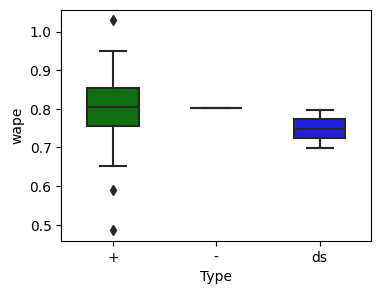

In [6]:
plt.figure(figsize=(4, 3))
sns.boxplot(vir_fit.reset_index(), x='Type', y='wape', 
            palette=['green', 'orange', 'blue'], width=0.5)

## Random model fit results

In [9]:
metrics_rnd_df = pd.read_csv('data/virs_rnd_fit_metrics.csv', index_col=[0,1,2,3])
print(metrics_rnd_df.shape)

(441, 13)


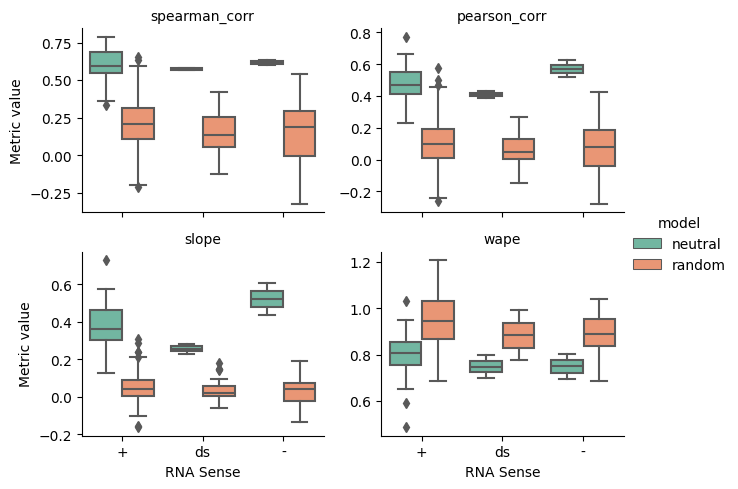

In [11]:
_ = metrics_rnd_df[['spearman_corr', 'pearson_corr', 'slope', 'wape']]\
    .melt(ignore_index=False, var_name='metric').reset_index()
g = sns.catplot(data=_, sharey=False, kind='box', col='metric', col_wrap=2,
                y='value', hue='model', x='Type', palette='Set2', height=2.5, aspect=1.3,
)
g.set_titles('{col_name}')
# g.set_xticklabels(g.axes[2].get_xticklabels(), rotation=-45)
g.set_xlabels('RNA Sense')
g.set_ylabels('Metric value')
g.savefig('./figures/vir_rnd_fit_metrics_boxplots.pdf')


In [26]:
# correlations significance
metrics_rnd_df[['spearman_p', 'pearson_p']]\
    .melt(ignore_index=False, var_name='metric').reset_index()\
        .groupby(['model',  'metric']).value.agg(['mean', 'std', 'max']).round(5)

mean      std      max
model   metric                               
neutral pearson_p   0.00021  0.00094  0.00429
        spearman_p  0.00000  0.00001  0.00003
random  pearson_p   0.27891  0.29815  0.99747
        spearman_p  0.14009  0.24925  0.97650

In [ ]:
# correlations significance
metrics_rnd_df[['spearman_p', 'pearson_p']]\
    .melt(ignore_index=False, var_name='metric').reset_index()\
        .groupby(['model', 'Type',  'metric']).value.agg(['mean', 'std', 'max']).round(5)

mean      std      max
model   Type metric                               
neutral +    pearson_p   0.00026  0.00104  0.00429
             spearman_p  0.00000  0.00001  0.00003
        -    pearson_p   0.00000  0.00000  0.00000
             spearman_p  0.00000  0.00000  0.00000
        ds   pearson_p   0.00000  0.00000  0.00000
             spearman_p  0.00000  0.00000  0.00000
random  +    pearson_p   0.27870  0.29544  0.99537
             spearman_p  0.13574  0.24217  0.97650
        -    pearson_p   0.23043  0.30140  0.96808
             spearman_p  0.15182  0.26082  0.92556
        ds   pearson_p   0.32912  0.31701  0.99747
             spearman_p  0.16537  0.29778  0.96248